In [14]:
import sys, os

root_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
if root_path not in sys.path:
    sys.path.append(root_path)
    
from src.load_data import * 
from src.model import * 
from src.train_loop import *

In [ ]:

train_loader , test_loader = create_data()

images, labels = next(iter(train_loader))
print("Batch X shape:", images.shape)
print("Batch y shape:", labels.shape)
print("Clases únicas en y:", labels.unique())


100%|██████████| 170M/170M [00:13<00:00, 12.9MB/s]


Batch X shape: torch.Size([32, 3, 64, 64])
Batch y shape: torch.Size([32])
Clases únicas en y: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


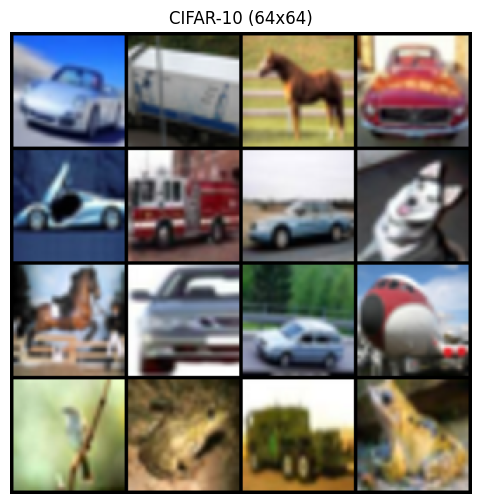

In [3]:
grid = vutils.make_grid(images[:16], nrow=4, normalize=True, scale_each=True)
plt.figure(figsize=(6,6))
plt.axis("off")
plt.title("CIFAR-10 (64x64)")
plt.imshow(grid.permute(1, 2, 0).numpy())
plt.show()

## Create the models 

In [13]:
import torch.optim as optim
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

latent_dim = 100
gen = Generator(latent_dim=latent_dim, ngf=128, img_channels=3).to(device)
disc = Discriminator(img_channels=3, base=128, max_ch=1024).to(device)

gen.apply(weights_init_dcgan_sn)
disc.apply(weights_init_dcgan_sn)

criterion = nn.BCEWithLogitsLoss()
optimizerDisc = optim.Adam(disc.parameters(), lr=2e-4, betas=(0.5, 0.999))
optimizerGen = optim.Adam(gen.parameters(), lr=1e-4, betas=(0.5, 0.999))

## Train the first 80 epochs 

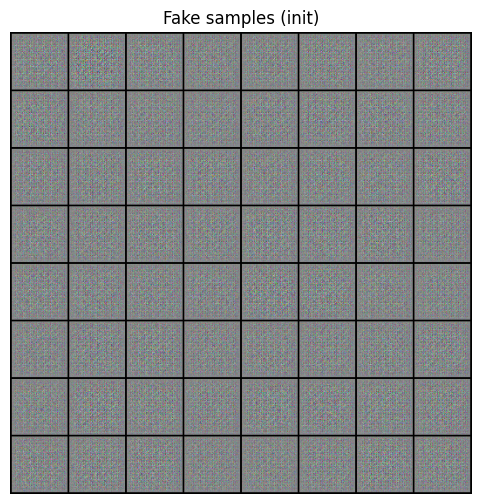

[Epoch 002/80] loss_D=1.5280 | loss_G=0.6745 | D(real)=0.32 | D(fake)=-0.83 | Dsteps=1 | Gsteps=1
[Epoch 004/80] loss_D=1.6893 | loss_G=0.4542 | D(real)=0.14 | D(fake)=-0.39 | Dsteps=1 | Gsteps=1


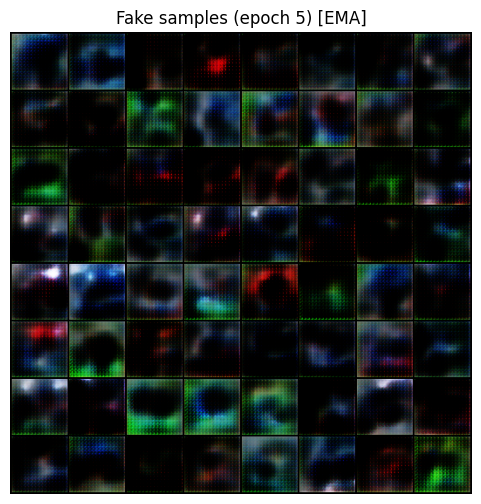

[Epoch 006/80] loss_D=1.7834 | loss_G=0.2646 | D(real)=-0.12 | D(fake)=-0.66 | Dsteps=1 | Gsteps=1
[Epoch 008/80] loss_D=1.7697 | loss_G=0.2573 | D(real)=0.17 | D(fake)=0.10 | Dsteps=1 | Gsteps=1
[Epoch 010/80] loss_D=1.7868 | loss_G=0.2198 | D(real)=0.53 | D(fake)=0.10 | Dsteps=1 | Gsteps=1


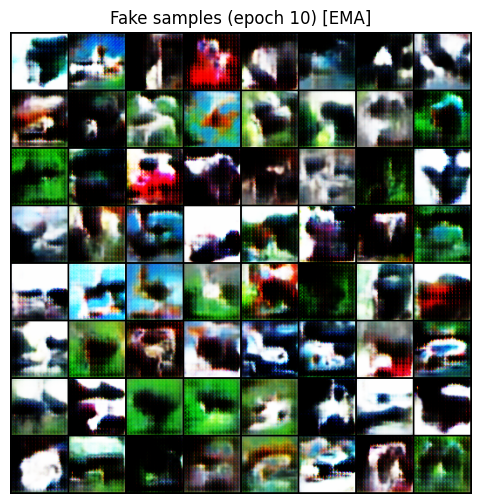

[Epoch 012/80] loss_D=1.8414 | loss_G=0.2248 | D(real)=-0.19 | D(fake)=-0.61 | Dsteps=1 | Gsteps=1
[Epoch 014/80] loss_D=1.8490 | loss_G=0.2048 | D(real)=0.41 | D(fake)=0.17 | Dsteps=1 | Gsteps=1


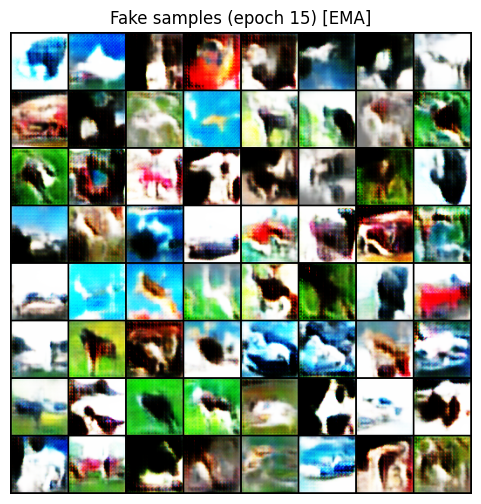

[Epoch 016/80] loss_D=1.8759 | loss_G=0.2047 | D(real)=0.22 | D(fake)=-0.00 | Dsteps=1 | Gsteps=1
[Epoch 018/80] loss_D=1.8651 | loss_G=0.1825 | D(real)=0.27 | D(fake)=-0.00 | Dsteps=1 | Gsteps=1
[Epoch 020/80] loss_D=1.8866 | loss_G=0.1683 | D(real)=0.13 | D(fake)=0.13 | Dsteps=1 | Gsteps=1


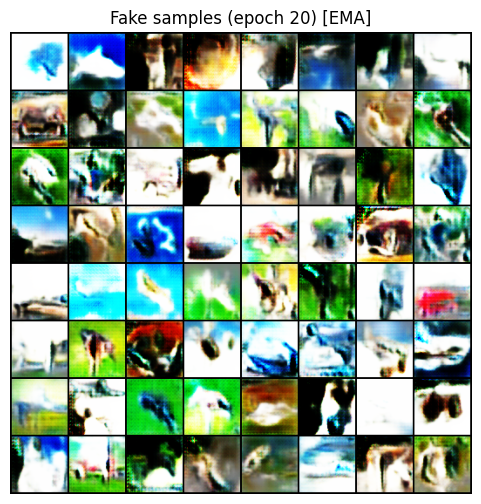

[Epoch 022/80] loss_D=1.8980 | loss_G=0.1559 | D(real)=0.35 | D(fake)=0.12 | Dsteps=1 | Gsteps=1
[Epoch 024/80] loss_D=1.8967 | loss_G=0.1800 | D(real)=-0.28 | D(fake)=-0.09 | Dsteps=1 | Gsteps=1


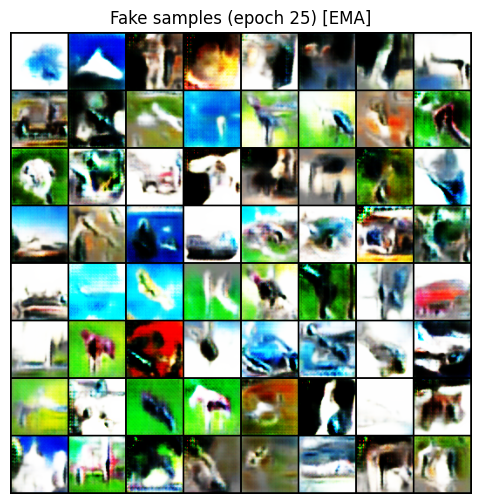

[Epoch 026/80] loss_D=1.9057 | loss_G=0.1809 | D(real)=0.01 | D(fake)=-0.29 | Dsteps=1 | Gsteps=1
[Epoch 028/80] loss_D=1.9009 | loss_G=0.1706 | D(real)=0.16 | D(fake)=0.18 | Dsteps=1 | Gsteps=1
[Epoch 030/80] loss_D=1.9009 | loss_G=0.1499 | D(real)=0.40 | D(fake)=-0.28 | Dsteps=1 | Gsteps=1


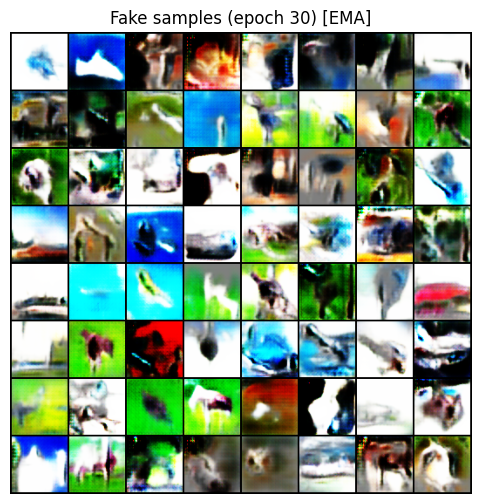

[Epoch 032/80] loss_D=1.9028 | loss_G=0.1449 | D(real)=-0.24 | D(fake)=-0.18 | Dsteps=1 | Gsteps=1
[Epoch 034/80] loss_D=1.9143 | loss_G=0.1380 | D(real)=-0.04 | D(fake)=-0.30 | Dsteps=1 | Gsteps=1


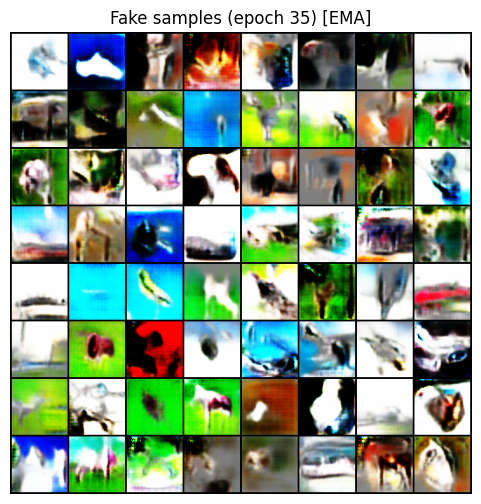

[Epoch 036/80] loss_D=1.9078 | loss_G=0.1099 | D(real)=-0.01 | D(fake)=0.04 | Dsteps=1 | Gsteps=1
[Epoch 038/80] loss_D=1.9120 | loss_G=0.1453 | D(real)=0.24 | D(fake)=0.14 | Dsteps=1 | Gsteps=1
[Epoch 040/80] loss_D=1.9031 | loss_G=0.1106 | D(real)=0.10 | D(fake)=-0.03 | Dsteps=1 | Gsteps=1


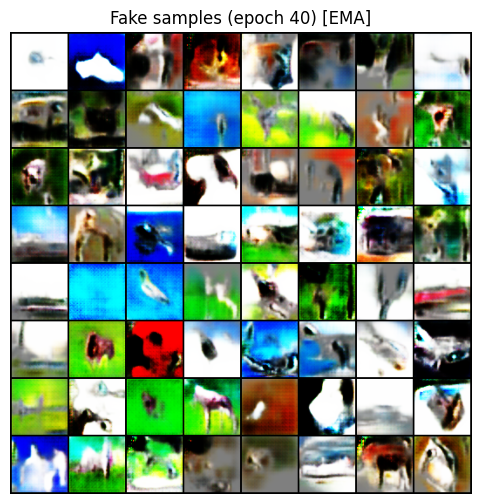

[Epoch 042/80] loss_D=1.9105 | loss_G=0.1363 | D(real)=-0.30 | D(fake)=0.02 | Dsteps=1 | Gsteps=1
[Epoch 044/80] loss_D=1.9134 | loss_G=0.1393 | D(real)=-0.09 | D(fake)=-0.36 | Dsteps=1 | Gsteps=1


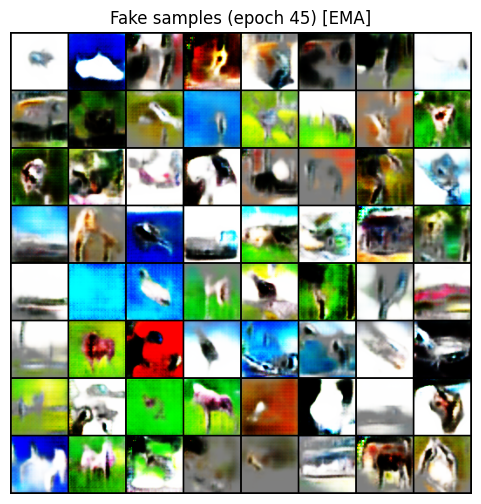

[Epoch 046/80] loss_D=1.9135 | loss_G=0.1063 | D(real)=-0.15 | D(fake)=-0.41 | Dsteps=1 | Gsteps=1
[Epoch 048/80] loss_D=1.9114 | loss_G=0.0808 | D(real)=-0.72 | D(fake)=-0.79 | Dsteps=1 | Gsteps=1
[Epoch 050/80] loss_D=1.9221 | loss_G=0.1282 | D(real)=-0.18 | D(fake)=-0.13 | Dsteps=1 | Gsteps=1


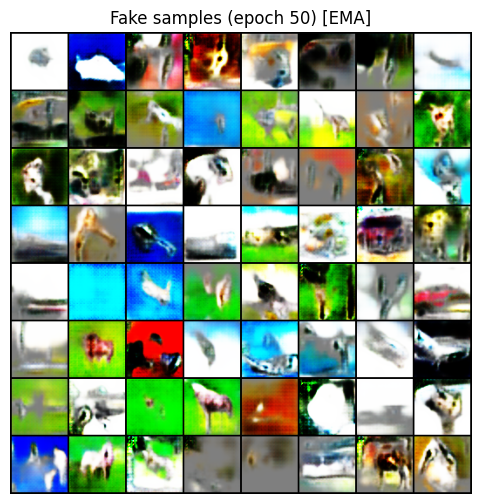

[Epoch 052/80] loss_D=1.9201 | loss_G=0.1214 | D(real)=-0.09 | D(fake)=0.02 | Dsteps=1 | Gsteps=1
[Epoch 054/80] loss_D=1.9164 | loss_G=0.1041 | D(real)=-0.12 | D(fake)=0.14 | Dsteps=1 | Gsteps=1


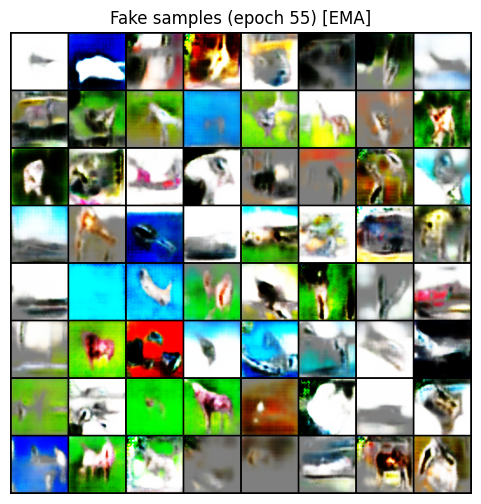

[Epoch 056/80] loss_D=1.9209 | loss_G=0.1348 | D(real)=0.24 | D(fake)=0.52 | Dsteps=1 | Gsteps=1
[Epoch 058/80] loss_D=1.9225 | loss_G=0.1087 | D(real)=-0.32 | D(fake)=-0.26 | Dsteps=1 | Gsteps=1
[Epoch 060/80] loss_D=1.9200 | loss_G=0.1301 | D(real)=-0.40 | D(fake)=-0.20 | Dsteps=1 | Gsteps=1


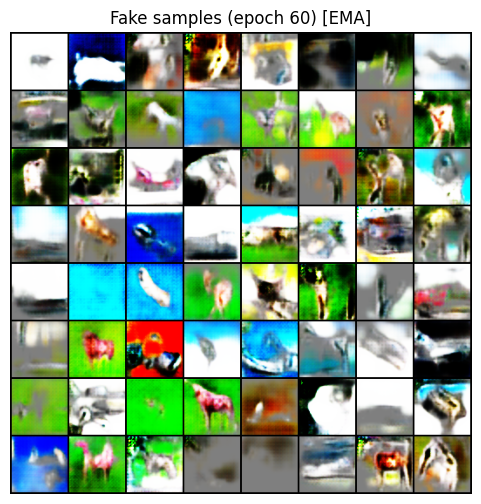

[Epoch 062/80] loss_D=1.9230 | loss_G=0.1038 | D(real)=-0.51 | D(fake)=-0.68 | Dsteps=1 | Gsteps=1
[Epoch 064/80] loss_D=1.9158 | loss_G=0.1209 | D(real)=0.26 | D(fake)=-0.14 | Dsteps=1 | Gsteps=1


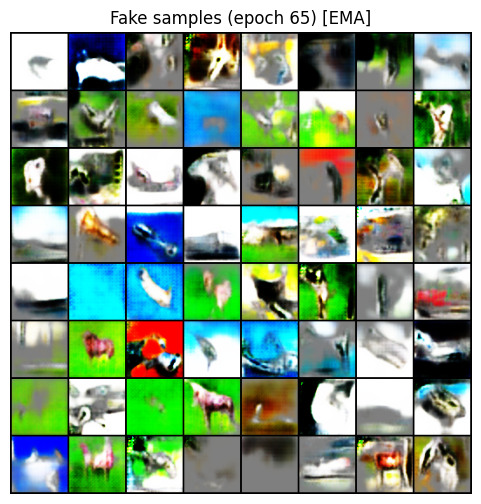

[Epoch 066/80] loss_D=1.9156 | loss_G=0.0846 | D(real)=0.58 | D(fake)=0.36 | Dsteps=1 | Gsteps=1
[Epoch 068/80] loss_D=1.9252 | loss_G=0.1466 | D(real)=-0.40 | D(fake)=-0.31 | Dsteps=1 | Gsteps=1
[Epoch 070/80] loss_D=1.9328 | loss_G=0.1284 | D(real)=0.24 | D(fake)=0.20 | Dsteps=1 | Gsteps=1


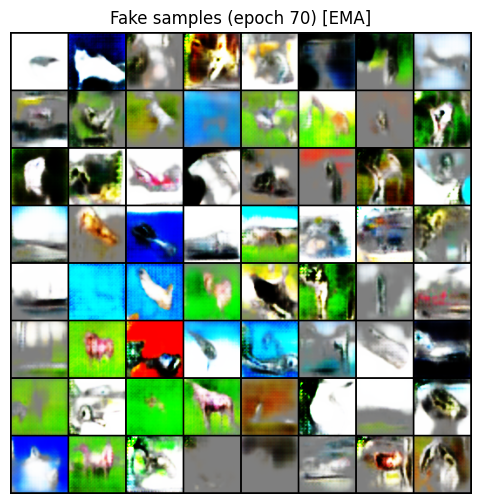

[Epoch 072/80] loss_D=1.9307 | loss_G=0.1556 | D(real)=-0.40 | D(fake)=-0.48 | Dsteps=1 | Gsteps=1
[Epoch 074/80] loss_D=1.9176 | loss_G=0.1050 | D(real)=-0.37 | D(fake)=-0.40 | Dsteps=1 | Gsteps=1


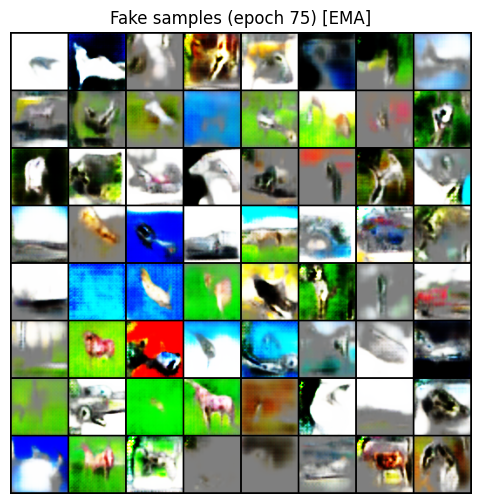

[Epoch 076/80] loss_D=1.9350 | loss_G=0.1203 | D(real)=-0.07 | D(fake)=-0.18 | Dsteps=1 | Gsteps=1
[Epoch 078/80] loss_D=1.9326 | loss_G=0.0987 | D(real)=0.40 | D(fake)=0.30 | Dsteps=1 | Gsteps=1
[Epoch 080/80] loss_D=1.9287 | loss_G=0.1036 | D(real)=0.13 | D(fake)=0.31 | Dsteps=1 | Gsteps=1


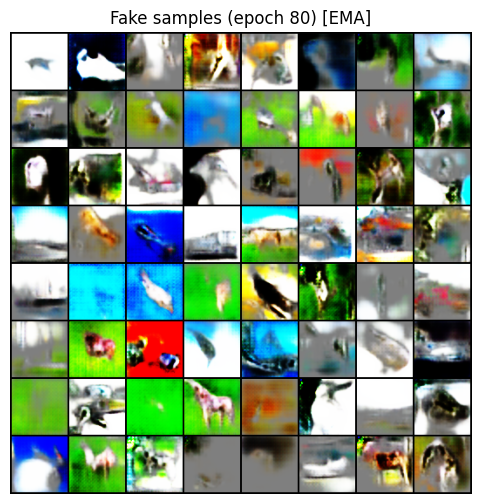

In [ ]:
history = train_gan(
    train_loader, gen, disc,
    optimizerGen, optimizerDisc, criterion=None,
    latent_dim=100, epochs=80, hinge=True,
    disc_steps=2,                
    g_warmup_epochs=5,           
    g_warmup_train_gen=1,        
    use_ema=True, ema_decay=0.999,
    use_diffaug=True,
    r1_every=16, gamma=5)


---

##  Regla práctica con Hinge GANs

- **Si G engaña a D**  
  - `D(fake).mean`: sube de negativo → hacia **0** → incluso positivo.  
  - `Loss_G`: **baja** (G logra confundir).  
  - `Loss_D`: puede **subir** porque el margen se viola más a menudo.  

- **Si G pierde**  
  - `D(fake).mean`: se queda **< −1**.  
  - `Loss_G`: **sube** (G recibe penalización fuerte).  
  - `Loss_D`: suele estar **bajo (~0.5–1.5)** porque D clasifica fácil.  

- **Balance sano (entrenamiento estable)**  
  - `D(real).mean ≈ 2–5`  
  - `D(fake).mean ≈ −1..0` (oscila durante el training)  
  - `Loss_D ≈ 0.5–2` (o 4–8  R1 penalty).  
  - `Loss_G ≈ 0.5–1.5` (oscila, pero **no se dispara**).  

---


| Escenario                        | Señal en logs                           | Qué significa                          |
|----------------------------------|------------------------------------------|-----------------------------------------|
| D(real) < 0                      | Discriminador no reconoce reales         | D demasiado débil / LR bajo / Gsteps alto |
| D(fake) ≪ −1 (ej. −2, −3…)       | Falsas muy fáciles de detectar           | D domina, G no aprende (Loss_G alto)    |
| D(fake) ≈ 0 o > 0                | Discriminador “cree” en fakes            | G está engañando (Loss_G bajo)          |
| Loss_D ≈ 0.5–2                   | Balanceado (sin R1)                      | Entrenamiento sano                      |
| Loss_D ≫ 4–8 (con R1)            | Penalización de gradiente fuerte         | Normal si usas R1 cada N pasos          |
| Loss_G ≫ 2                       | Generador colapsando, gradientes débiles | Ajustar LR/steps o regularización       |





In [ ]:
torch.save(gen.state_dict(), "SN-Generador.pth")
torch.save(disc.state_dict(), "SN-Discriminador.pth")

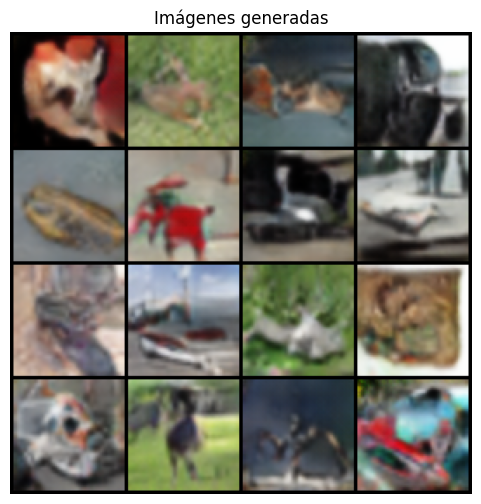

In [17]:
z = torch.randn(16, 100, device=device)

gen.eval()
with torch.no_grad():
  fake_imgs = gen(z).detach().cpu()

grid = vutils.make_grid(fake_imgs, normalize=True, nrow=4)
plt.figure(figsize=(6,6))
plt.axis("off")
plt.title("Imágenes generadas")
plt.imshow(grid.permute(1, 2, 0).numpy())
plt.show()